In [1]:
####
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors

from netCDF4 import Dataset

import matplotlib.gridspec as gridspec
import statsmodels.tsa.stattools as smt

import iris
import iris.plot as iplt
iris.FUTURE.netcdf_promote=True
import iris.coord_categorisation
from eofs.iris import Eof
from iris.analysis import stats

import pandas as pd

from matplotlib.patches import FancyArrowPatch

import xarray as xr

In [2]:
# Upload observations
file_obs = ('NOAAERSSTv5_1870_2018_obs_annual_mean_st_dev_rmeans.nc')

hf_obs = iris.Constraint(cube_func=lambda cube: cube.var_name == 'st_dev_hf_obs')
lf_obs = iris.Constraint(cube_func=lambda cube: cube.var_name == 'st_dev_lf_obs')

cube_obs_hf = iris.load_cube(file_obs, hf_obs)
cube_obs_lf = iris.load_cube(file_obs, lf_obs)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdty

In [3]:
# Upload Eoi400 simulations (MP)
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']#, 'MMM_MP'
names_models_mp = ['0-200_timeseries_CCSM4Utr','501-1099_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2001-2501_timeseries_HadCM3','1850-2049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '1001-1200_timeseries_NorESML']#,'MMM_mp_timeseries'
MP_hf_index = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube('EOI400.SST.'+names_models_mp[i]+'_no_ann_cycle_st_dev_rmeans.nc', 
                                    iris.Constraint(cube_func=lambda cube: cube.var_name == 'st_dev_hf_mp'))
    uploaded_cubes = iris.util.squeeze(uploaded_cubes)
    MP_hf_index.append(uploaded_cubes)

MP_lf_index = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube('EOI400.SST.'+names_models_mp[i]+'_no_ann_cycle_st_dev_rmeans.nc', 
                                    iris.Constraint(cube_func=lambda cube: cube.var_name == 'st_dev_lf_mp'))
    uploaded_cubes = iris.util.squeeze(uploaded_cubes)
    MP_lf_index.append(uploaded_cubes)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1905: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/apps/developers/libraries/python-libs/1.6/1/bi

In [4]:
# Upload E280 simulations (PI)
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']#, 'MMM_PI'
names_models_pi = ['0-200_timeseries_CCSM4Utr','501-806_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2411-2911_timeseries_HadCM3','2850-3049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '0-200_timeseries_NorESML']#,'MMM_pi_timeseries'
PI_hf_index = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube('E280.SST.'+names_models_pi[i]+'_no_ann_cycle_st_dev_rmeans.nc', 
                                    iris.Constraint(cube_func=lambda cube: cube.var_name == 'st_dev_hf_pi'))
    uploaded_cubes = iris.util.squeeze(uploaded_cubes)
    PI_hf_index.append(uploaded_cubes)

PI_lf_index = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube('E280.SST.'+names_models_pi[i]+'_no_ann_cycle_st_dev_rmeans.nc', 
                                    iris.Constraint(cube_func=lambda cube: cube.var_name == 'st_dev_lf_pi'))
    uploaded_cubes = iris.util.squeeze(uploaded_cubes)
    PI_lf_index.append(uploaded_cubes)


/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1905: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/apps/developers/libraries/python-libs/1.6/1/bi

## Spatial constrain

#### Central Pacific (high frequency)

In [5]:
#ENSO3.4 region
# Delimt the region for the cube
min_lat = -5.0
max_lat = 5.0
min_lon = 190.0
max_lon = 240.0

# Functions to identify latitudes and longitudes we want to subset to
def nino_lat(input):
    return min_lat  <= input <= max_lat 
def nino_lon(input):
    return min_lon  <= input <= max_lon 

nino_con = iris.Constraint(latitude = nino_lat, longitude = nino_lon)

# Subset the cubes
nino_obs_hf = nino_con.extract(cube_obs_hf)

nino_mp_hf = []
for i in MP_hf_index:
    nino_mp_sub = nino_con.extract(i)
    nino_mp_hf.append(nino_mp_sub)
    
nino_pi_hf = []
for j in PI_hf_index:
    nino_pi_sub = nino_con.extract(j)
    nino_pi_hf.append(nino_pi_sub)

In [6]:
## Spatial average
mean_nino_obs_hf = nino_obs_hf.collapsed(['latitude', 'longitude'],iris.analysis.MEAN)

mean_nino_mp = []
mean_nino_pi = []

for e in range(len(nino_mp_hf)):
    equator_mean_mp34 = nino_mp_hf[e].collapsed(['latitude', 'longitude'],iris.analysis.MEAN)
    equator_mean_pi34 = nino_pi_hf[e].collapsed(['latitude', 'longitude'],iris.analysis.MEAN)
    mean_nino_mp.append(equator_mean_mp34)
    mean_nino_pi.append(equator_mean_pi34)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [7]:
### MMM 
MMM_hf_MP = sum([mean_nino_mp[i].data for i in range(np.size(mean_nino_mp))])/7
MMM_hf_PI = sum([mean_nino_pi[i].data for i in range(np.size(mean_nino_pi))])/7
## Convert arrays to iris cubes
MMM_mp_nino_cube = mean_nino_mp[0].copy(data = MMM_hf_MP)
MMM_pi_nino_cube = mean_nino_pi[0].copy(data = MMM_hf_PI)

In [8]:
### Concatenate
amp_nino_mp = [mean_nino_mp[j].data for j in range(np.size(mean_nino_mp))] + [MMM_mp_nino_cube.data]
amp_nino_pi = [mean_nino_pi[j].data for j in range(np.size(mean_nino_pi))] + [MMM_pi_nino_cube.data]

#### North Pacific (low frequency)

In [9]:
#PDO region
# Delimt the region for the cube
min_lat = 20.0
max_lat = 70.0
min_lon = 120.0
max_lon = 240.0

# Functions to identify latitudes and longitudes we want to subset to
def pdo_lat(input):
    return min_lat  <= input <= max_lat 
def pdo_lon(input):
    return min_lon  <= input <= max_lon 

pdo_con = iris.Constraint(latitude = pdo_lat, longitude = pdo_lon)
pdo_obs_lf = pdo_con.extract(cube_obs_lf)

pdo_mp_lf = []
for i in MP_hf_index:
    pdo_mp_sub = pdo_con.extract(i)
    pdo_mp_lf.append(pdo_mp_sub)
    
pdo_pi_lf = []
for j in PI_hf_index:
    pdo_pi_sub = pdo_con.extract(j)
    pdo_pi_lf.append(pdo_pi_sub)

In [10]:
## Spatial average
mean_pdo_obs_lf = pdo_obs_lf.collapsed(['latitude', 'longitude'],iris.analysis.MEAN)

mean_pdo_mp = []
mean_pdo_pi = []

for e in range(len(pdo_mp_lf)):
    np_mean_mp = pdo_mp_lf[e].collapsed(['latitude', 'longitude'],iris.analysis.MEAN)
    np_mean_pi = pdo_pi_lf[e].collapsed(['latitude', 'longitude'],iris.analysis.MEAN)
    mean_pdo_mp.append(np_mean_mp)
    mean_pdo_pi.append(np_mean_pi)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [11]:
### MMM 
MMM_lf_MP = sum([mean_pdo_mp[i].data for i in range(np.size(mean_pdo_mp))])/7
MMM_lf_PI = sum([mean_pdo_pi[i].data for i in range(np.size(mean_pdo_pi))])/7
## Convert arrays to iris cubes
MMM_mp_pdo_cube = mean_pdo_mp[0].copy(data = MMM_lf_MP)
MMM_pi_pdo_cube = mean_pdo_pi[0].copy(data = MMM_lf_PI)

In [12]:
### Concatenate
amp_pdo_mp = [mean_pdo_mp[j].data for j in range(np.size(mean_pdo_mp))] + [MMM_mp_pdo_cube.data]
amp_pdo_pi = [mean_pdo_pi[j].data for j in range(np.size(mean_pdo_pi))] + [MMM_pi_pdo_cube.data]

## Plot

### Central Pacific

In [13]:
change_nino = (np.array(amp_nino_mp)-np.array(amp_nino_pi))/np.array(amp_nino_pi)*100
change_numeric_nino = np.array([x.data if isinstance(x, iris.cube.Cube) else x for x in change_nino])
labels_nino_mp_str = ["%.f" % x for x in change_numeric_nino]

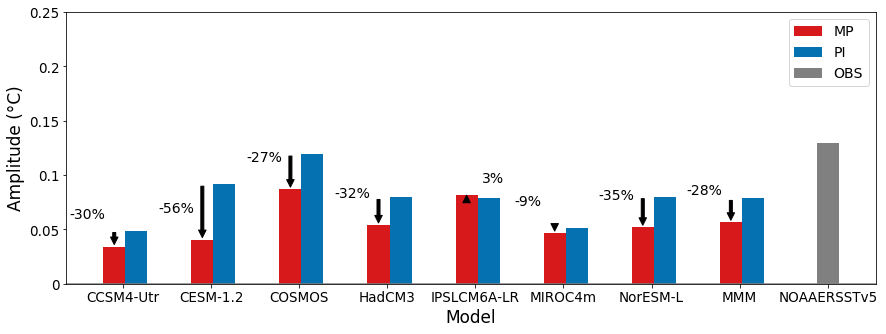

In [14]:
labels = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM']
labels2 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM','NOAAERSSTv5']

fig = plt.figure(figsize=(14.5, 5))
ax1 = fig.add_subplot(1, 1, 1)

# Plot bars
bars_mp = ax1.bar(np.arange(len(labels))+ 0.00, np.array(amp_nino_mp), 0.25, label='MP', color='#D7191C')
bars_pi = ax1.bar(np.arange(len(labels))+ 0.25, np.array(amp_nino_pi), 0.25, label='PI', color='#0571B0')
ax1.bar(8.1, np.array(mean_nino_obs_hf.data), 0.25, label='OBS', color='gray')

# Add labels to 'MP' bars
change = (np.array(amp_nino_mp)-np.array(amp_nino_pi))/np.array(amp_nino_pi)*100
labels_nino_mp_str = ["%.f" % x for x in change]
for i, rect in enumerate(bars_mp):
    if i == 4:
        ax1.annotate(labels_nino_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 + 0.3, rect.get_height()+0.006),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
    else:
        ax1.annotate(labels_nino_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 - 0.3, rect.get_height()+0.02),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
# Add arrows from 'PI' bars to 'MP' bars
for i in range(len(labels)):
    arrow = FancyArrowPatch(
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_pi[i].get_height()),
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_mp[i].get_height()),
        arrowstyle='simple', mutation_scale=15, color='black', linestyle='-'
    )
    ax1.add_patch(arrow)
               
ax1.set_xticks(np.arange(9) + 0.1)
ax1.set_xticklabels(labels2, fontsize=13.5)
ax1.set_yticks([0, 0.05, .1, .15, .2, .25])
ax1.set_yticklabels([0, 0.05, .1, .15, .2, .25], fontsize=13.5)

ax1.set_xlabel('Model', fontsize=17)
ax1.set_ylabel('Amplitude (°C)', fontsize=17)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1.5)
ax1.legend(fontsize=14)

#plt.savefig('Amplitudes_NINO_low_pass_index_change.png', bbox_inches = 'tight', dpi=300, format='png')
plt.show()

### North Pacific

In [15]:
change_pdo = (np.array(amp_pdo_mp)-np.array(amp_pdo_pi))/np.array(amp_pdo_pi)*100
change_numeric_pdo = np.array([x.data if isinstance(x, iris.cube.Cube) else x for x in change_pdo])
labels_pdo_mp_str = ["%.f" % x for x in change_numeric_pdo]

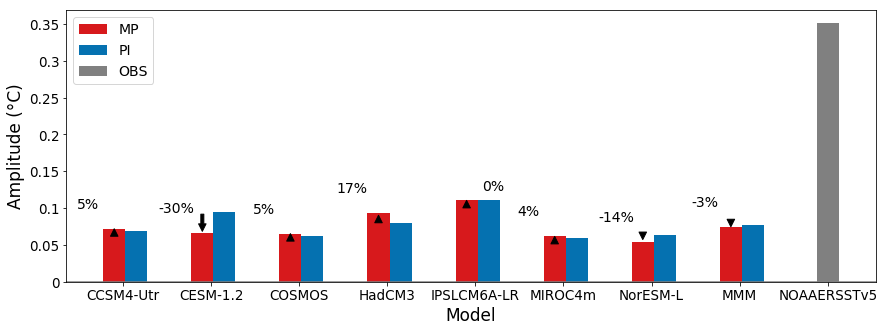

In [16]:
labels = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM']
labels2 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM','NOAAERSSTv5']

fig = plt.figure(figsize=(14.5, 5))
ax1 = fig.add_subplot(1, 1, 1)

# Plot bars
bars_mp = ax1.bar(np.arange(len(labels))+ 0.00, np.array(amp_pdo_mp), 0.25, label='MP', color='#D7191C')
bars_pi = ax1.bar(np.arange(len(labels))+ 0.25, np.array(amp_pdo_pi), 0.25, label='PI', color='#0571B0')
ax1.bar(8.1, np.array(mean_pdo_obs_lf.data), 0.25, label='OBS', color='gray')

# Add labels to 'MP' bars
change = (np.array(amp_pdo_mp)-np.array(amp_pdo_pi))/np.array(amp_pdo_pi)*100
labels_pdo_mp_str = ["%.f" % x for x in change]
for i, rect in enumerate(bars_mp):
    if i == 4:
        ax1.annotate(labels_pdo_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 + 0.3, rect.get_height()+0.006),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
    else:
        ax1.annotate(labels_pdo_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 - 0.3, rect.get_height()+0.02),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
# Add arrows from 'PI' bars to 'MP' bars
for i in range(len(labels)):
    arrow = FancyArrowPatch(
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_pi[i].get_height()),
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_mp[i].get_height()),
        arrowstyle='simple', mutation_scale=15, color='black', linestyle='-'
    )
    ax1.add_patch(arrow)
               
ax1.set_xticks(np.arange(9) + 0.1)
ax1.set_xticklabels(labels2, fontsize=13.5)
ax1.set_yticks([0, .05, .1, .15, .2, .25, .3, .35])
ax1.set_yticklabels([0, .05, .1, .15, .2, .25, .3, .35], fontsize=13.5)

ax1.set_xlabel('Model', fontsize=17)
ax1.set_ylabel('Amplitude (°C)', fontsize=17)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1.5)
ax1.legend(fontsize=14)

#plt.savefig('Amplitudes_PDO_low_pass_index_change.png', bbox_inches = 'tight', dpi=300, format='png')
plt.show()